#### ETS(Exponential Smoothing - 지수 평활법) Decomposition

    1. 시계열 분해 방법으로, 직관적으로 이해하기 쉽고 구현도 쉬움
    2. 시도표(Time Series Plot)를 보고 시계열의 주기적 반복/계절성을 확인하고, 가법 모형(additive model), 승법 모형(multiplicative model, y=t*s*r)중 더 적합한 것을 판단 후 모델링
    3. 가법 모형(additive model)의 경우 추세(trend)를 추출하기 위해 중심 이동 평균(centered moving average)를 활용
    4. 시계열 분해 후, 추세(trend)와 계절성(seasonality)를 제외한 잔차(residual)이 특정 패턴없이 무작위 분포를 띠고 작은 값이면 추세와 계절성으로 모델링하기 쉽다는 것을 의미
    5. 잔차 값이 특정 패턴(주기적인 파동, 분산이 점점 커짐 등)을 그린다면 잔차에 대해서만 다른 모형을 추가하는 것이 적합

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##### Additive Model

$y_t = Level + Trend + Seasonality + Noise$

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [18]:
series = pd.Series([i+np.random.randint(10) for i in range(1,100)])
series

0       6
1       5
2       3
3       8
4      11
     ... 
94     98
95     98
96     97
97    102
98    106
Length: 99, dtype: int64

In [58]:
result = seasonal_decompose(series, model='additive', freq=1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


In [59]:
result.resid

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
94    0.0
95    0.0
96    0.0
97    0.0
98    0.0
Name: resid, Length: 99, dtype: float64

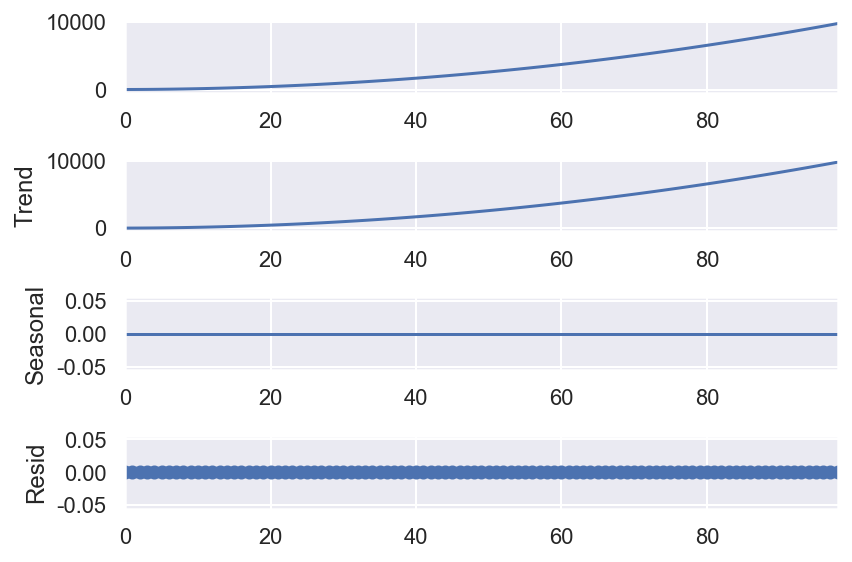

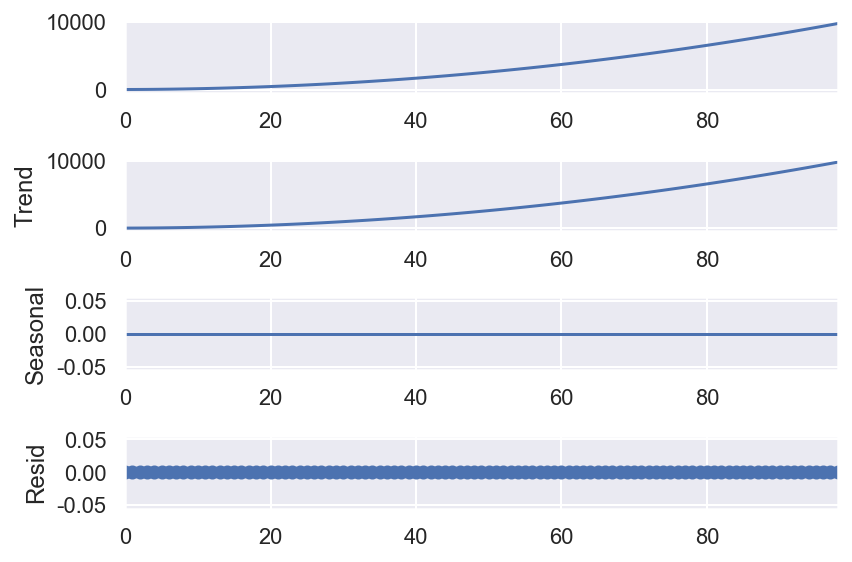

In [60]:
result.plot()

In [61]:
def plot_decompose(decomposeresult):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(14,6))
    decomposeresult.observed.plot(legend=False, ax=ax1)
    ax1.set_ylabel('Observerd')
    decomposeresult.trend.plot(legend=False, ax=ax2)
    ax2.set_ylabel('Trend')
    decomposeresult.seasonal.plot(legend=False, ax=ax3)
    ax3.set_ylabel('Seasonal')
    decomposeresult.resid.plot(legend=False, ax=ax4)
    ax4.set_ylabel('Resid')

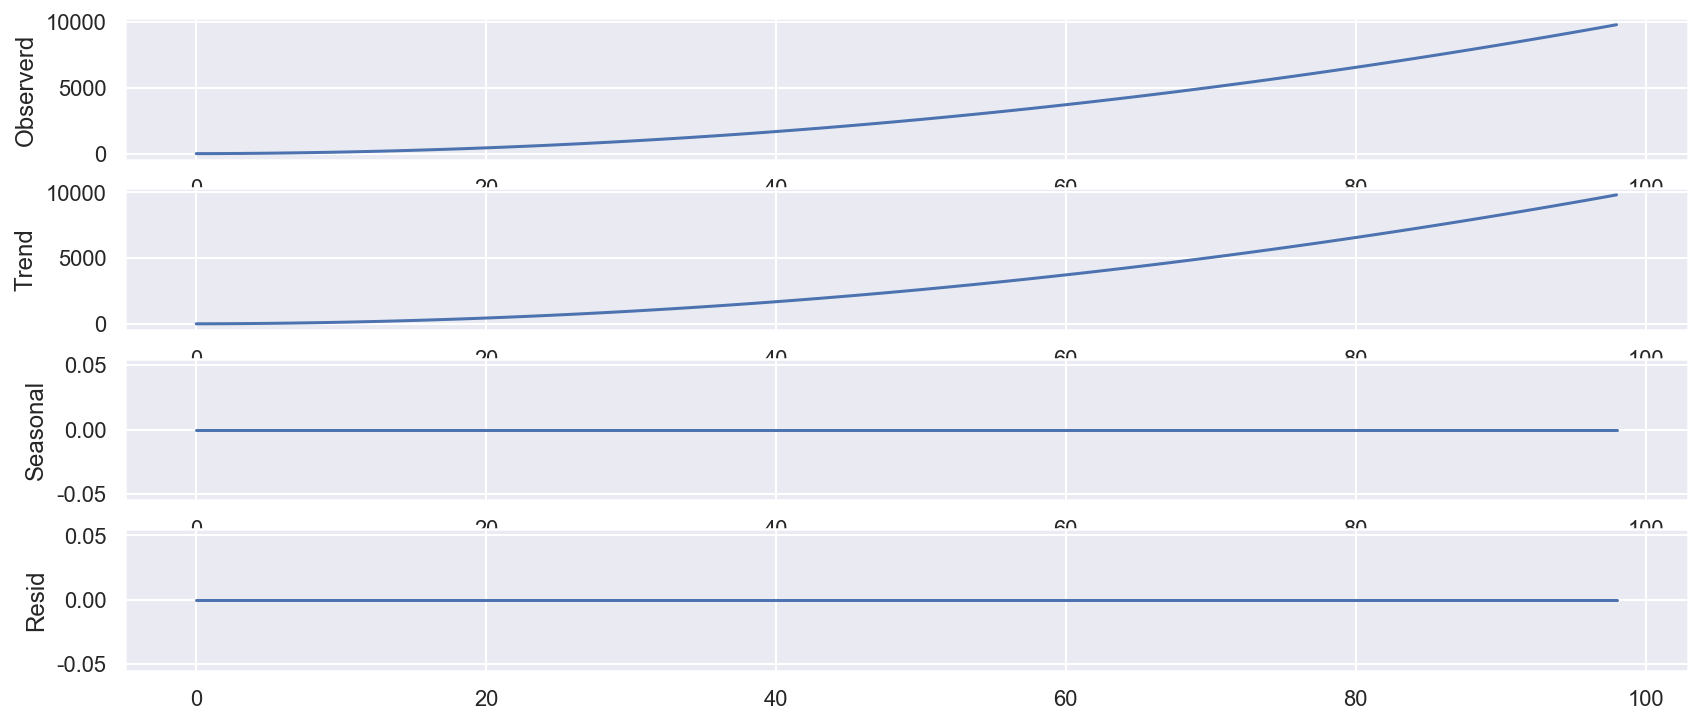

In [62]:
plot_decompose(result)

### Multiplicative Model

$y_t = Level \times Trend \times Seasonality \times Noise$

In [40]:
series = pd.Series([i**2 for i in range(1,100)]) #exp

result = seasonal_decompose(series, model='multiplicative', freq=1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  This is separate from the ipykernel package so we can avoid doing imports until


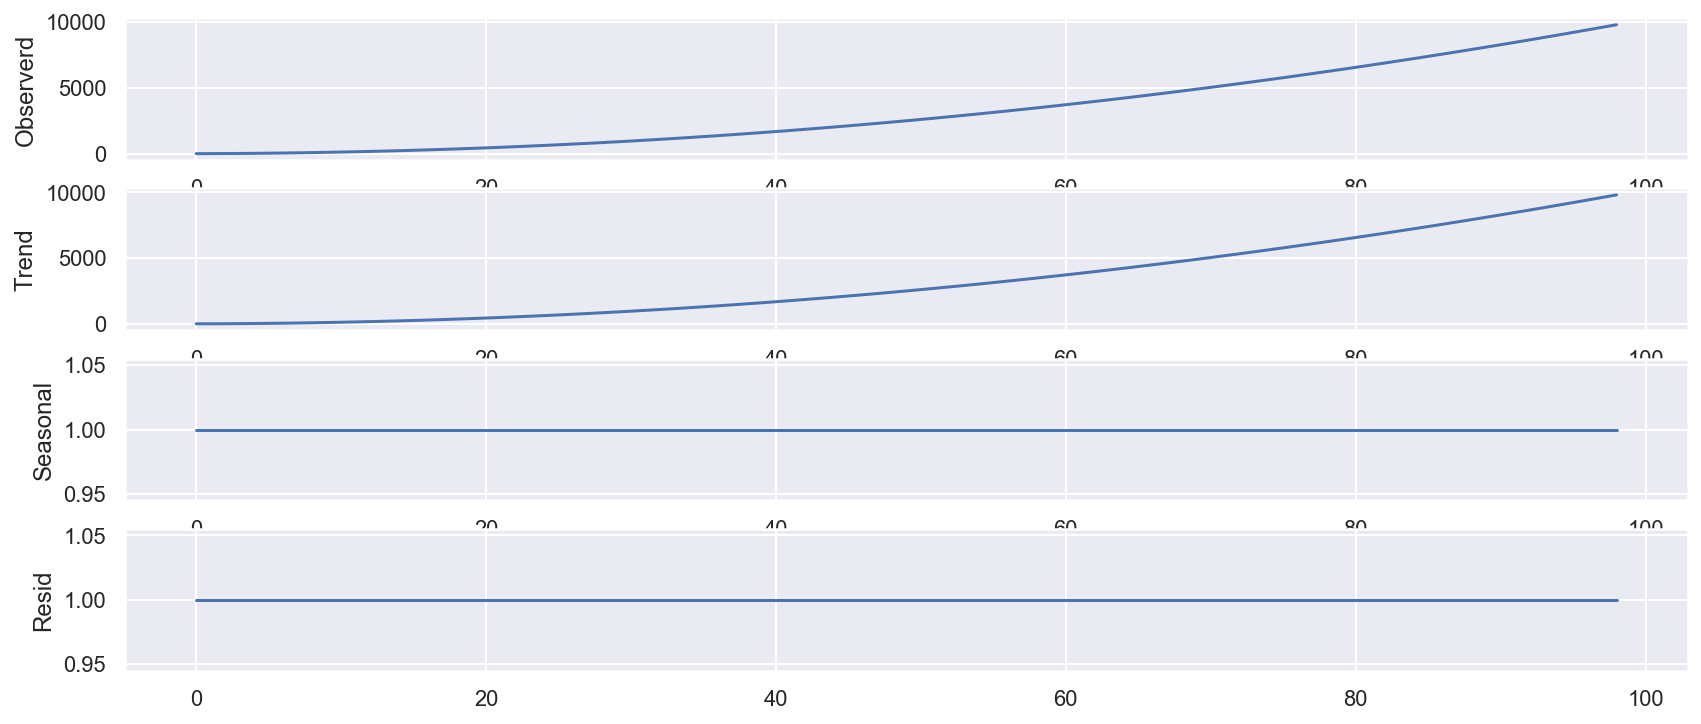

In [42]:
plot_decompose(result)

In [43]:
airline = pd.read_csv('data/airline_passengers.csv', index_col='Month')

In [45]:
airline.tail(2)

,Thousands of Passengers
Month,
1960-11,390
1960-12,432


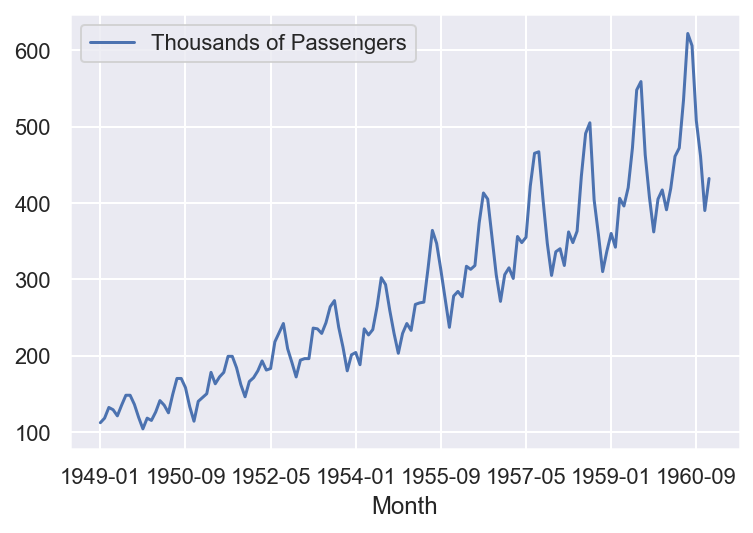

In [46]:
airline.plot()

## ETS

linear trend 를 가지고 있고 seasonality 와 trend 컴포넌트가 시간흐름에 따라 고정적일 때 (ex 매년 승객 1만명 증가) additive model 을 사용합니다. non-linear 하게 증가하거나 감소하는 trend 를 보일 경우 (ex 매년 승객 수 두 배 증가) multiplicative model 이 더 적합합니다.

챠트를 보면 초기에 비해 후기로 갈 수록 꾸준히 증가하는 비율로 비선형 증가 추세를 보이고 있습니다.

In [54]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [48]:
airline.index = pd.to_datetime(airline.index)

In [53]:
airline.tail(2)

,Thousands of Passengers
Month,
1960-11-01,390
1960-12-01,432


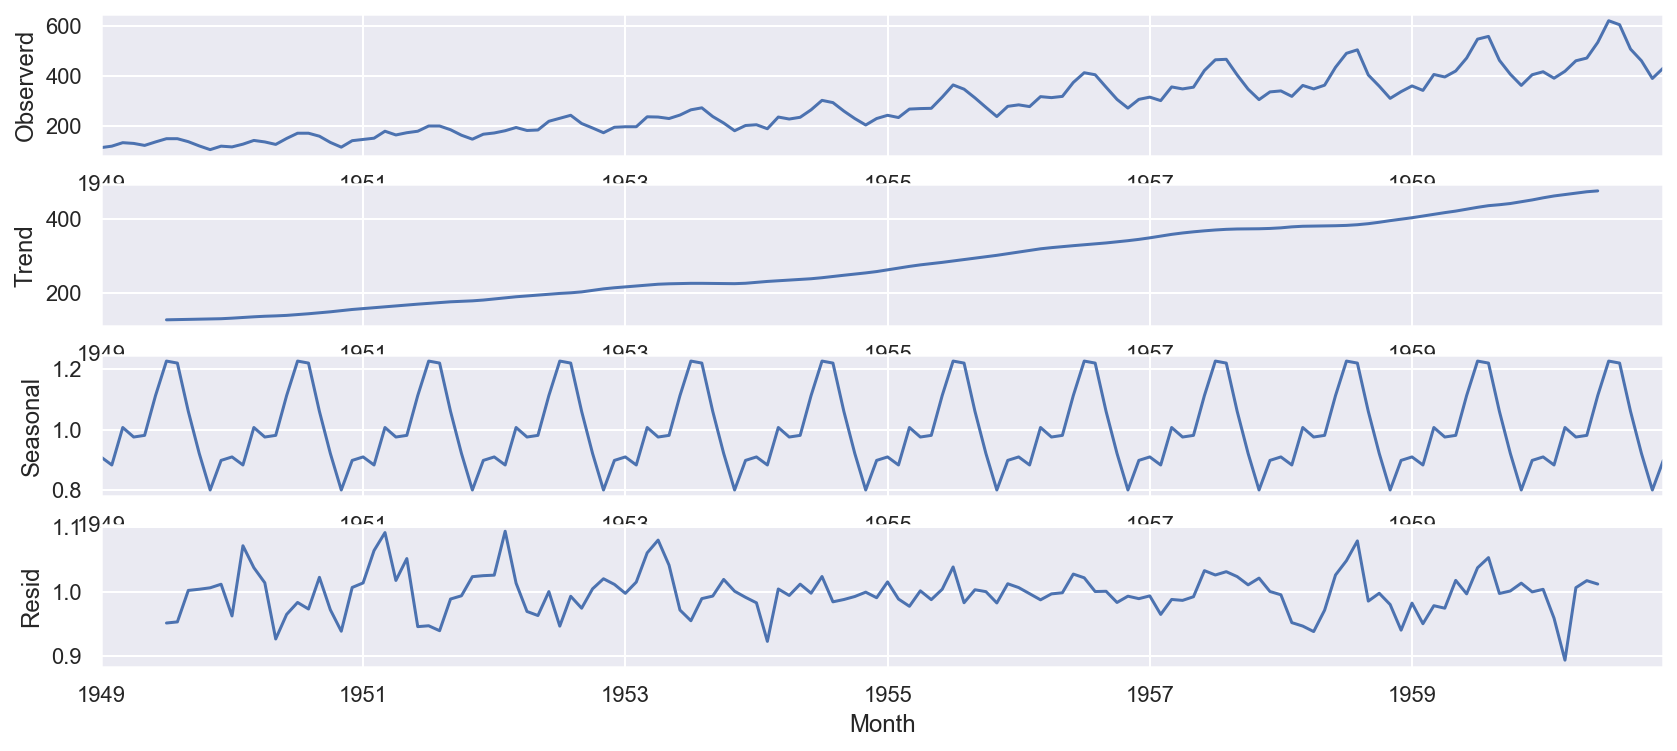

In [63]:
result = \
seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative')

plot_decompose(result)

우리가 시계열 데이터를 분석하고 모델링하고, 트렌드 제거, Seasonal 경향을 빼고 노이즈에서 패턴을 얻어서 모델링을 하고 Prediction할때는 Modeling + Seasonality + Trend 로 예측을 한다.

In [65]:
dates = pd.date_range('2020-01-01', periods=48, freq='MS')
dates

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
               '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01',
               '2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01',
               '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [116]:
# additive model = trend + cycle + seasonality + irregular factor

timestamp = np.arange(len(dates))
trend_factor = timestamp*1.1
cycle_factor = 10*np.sin(np.linspace(0, 3.14*2, 48))
seasonal_factor = 7*np.sin(np.linspace(0, 3.14*8, 48))
np.random.seed(2004)
irregular_factor = 2*np.random.randn(len(dates))

df = pd.DataFrame({'timeseries':trend_factor+cycle_factor+seasonal_factor+irregular_factor,
                  'trend':trend_factor,
                  'cycle':cycle_factor,
                  'trend_cycle':trend_factor+cycle_factor,
                   'seasonal':seasonal_factor,
                   'irregular':irregular_factor}, index=dates)

df.tail(2)

,timeseries,trend,cycle,trend_cycle,seasonal,irregular
2023-11-01,46.587633,50.6,-1.363760,49.236240,-3.642142,0.993536
2023-12-01,46.403326,51.7,-0.031853,51.668147,-0.089186,-5.175634


###### Python을 이용한 시계열 분해(Time series decomposition)
    - Python의 statsmodels 라이브러리를 사용해서 가법모형(additive model) 가정 하에 시계열 분해

In [118]:
from statsmodels.tsa.seasonal import seasonal_decompose

ts = df.timeseries
result = seasonal_decompose(ts, model='additive')

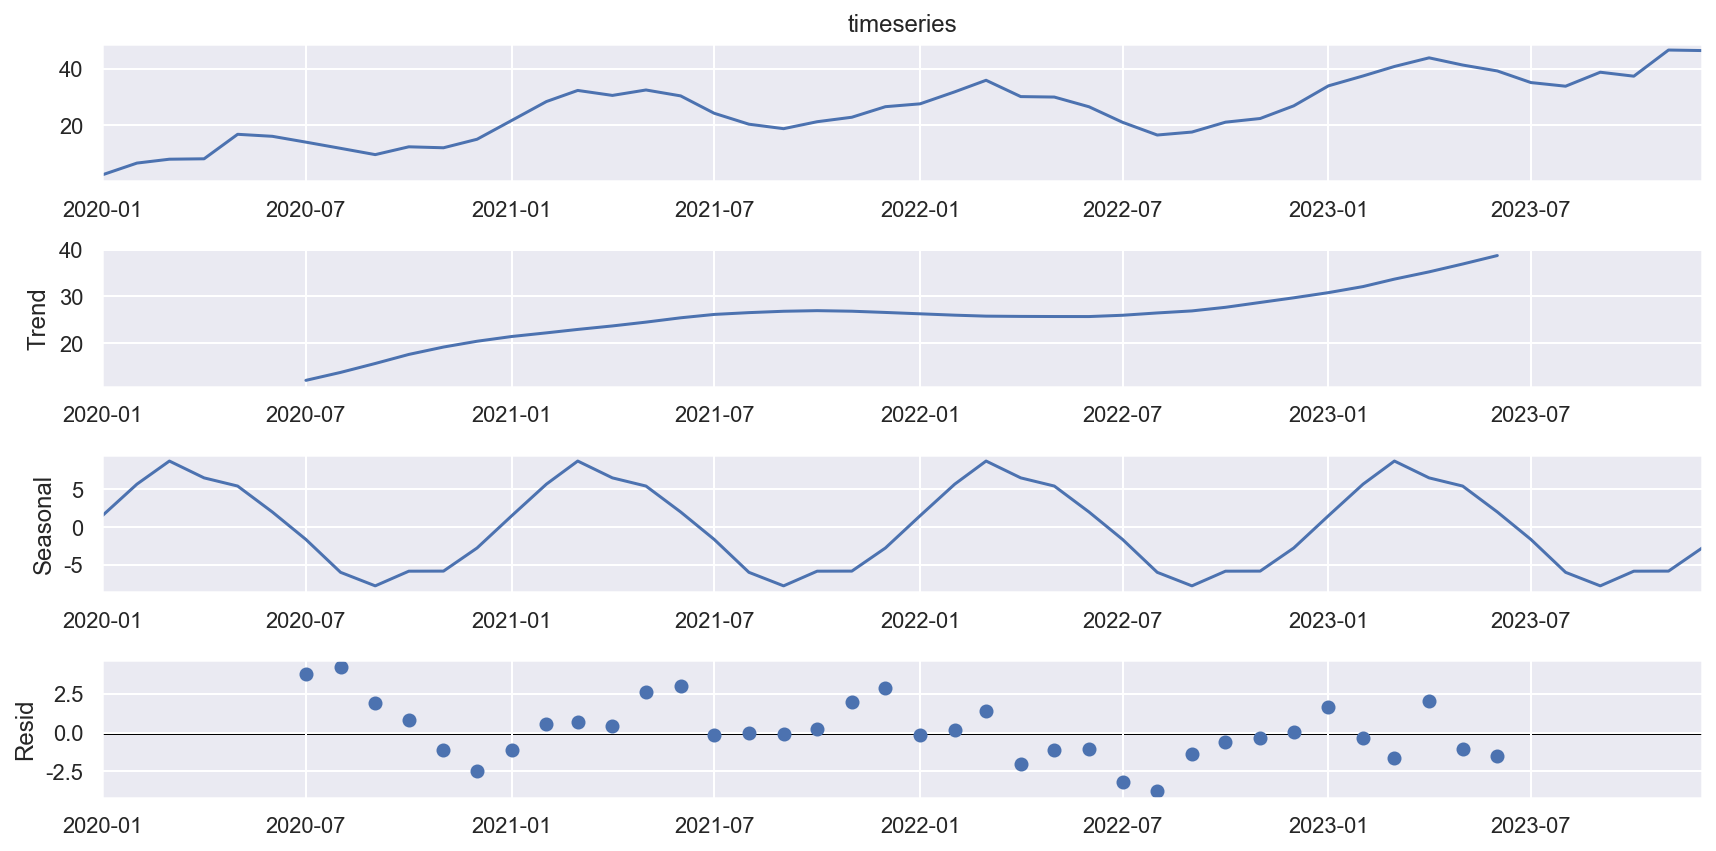

In [119]:
plt.rcParams['figure.figsize'] = [12,6]
result.plot()
plt.show()

In [120]:
def plot_decompose(decomposeresult):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(14,6))
    decomposeresult.observed.plot(legend=False, ax=ax1)
    ax1.set_ylabel('Observerd')
    decomposeresult.trend.plot(legend=False, ax=ax2)
    ax2.set_ylabel('Trend')
    decomposeresult.seasonal.plot(legend=False, ax=ax3)
    ax3.set_ylabel('Seasonal')
    decomposeresult.resid.plot(legend=False, ax=ax4)
    ax4.set_ylabel('Resid')

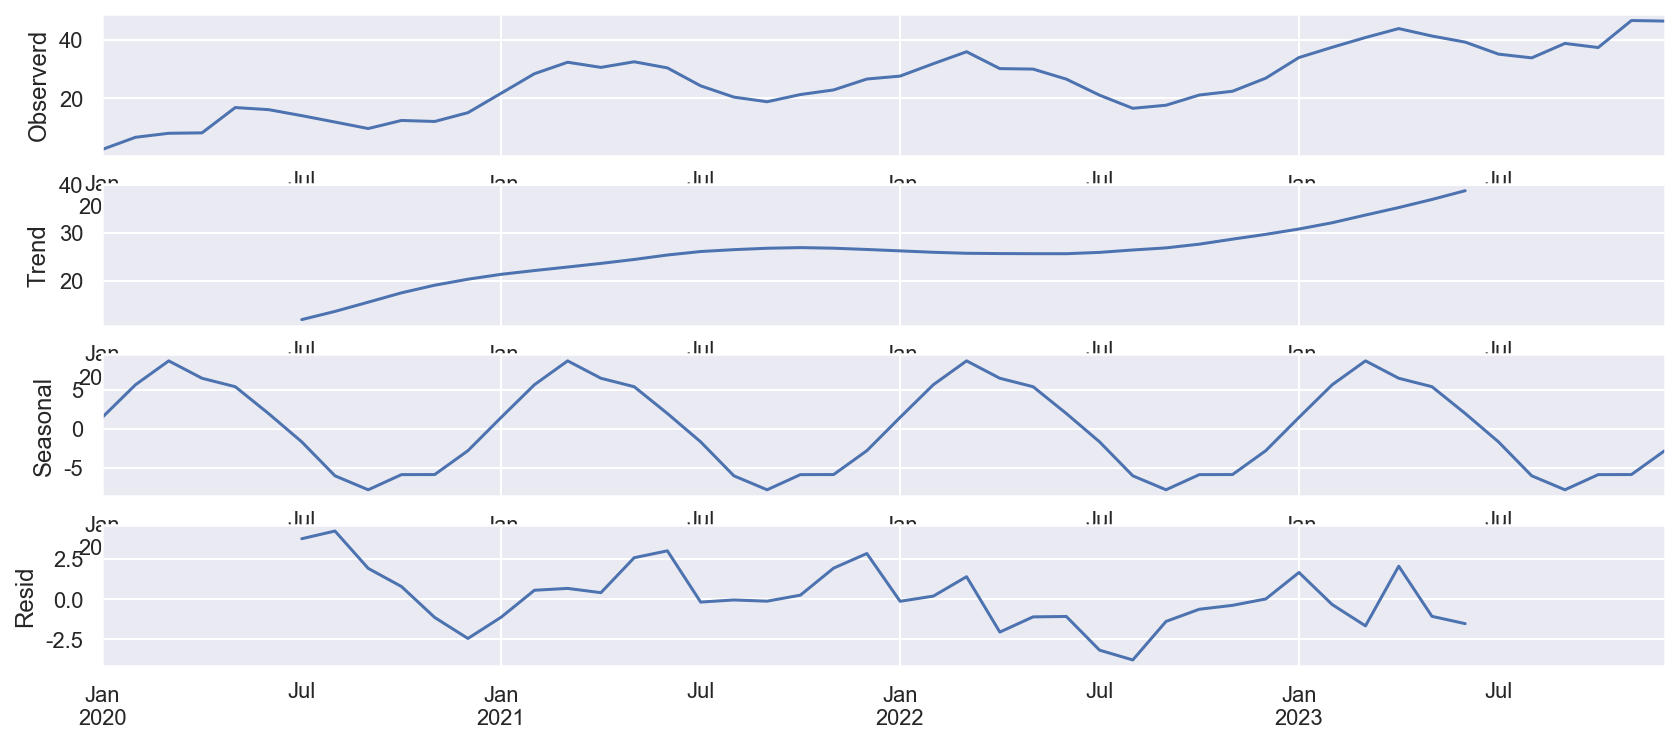

In [121]:
plot_decompose(result)

1. 원래의 시계열 데이터 구성요소(추세, 계절성, 잔차) 와 시계열 분해를 통해 분리한 추세, 계절성, 잔차를 겹친 후 시각화

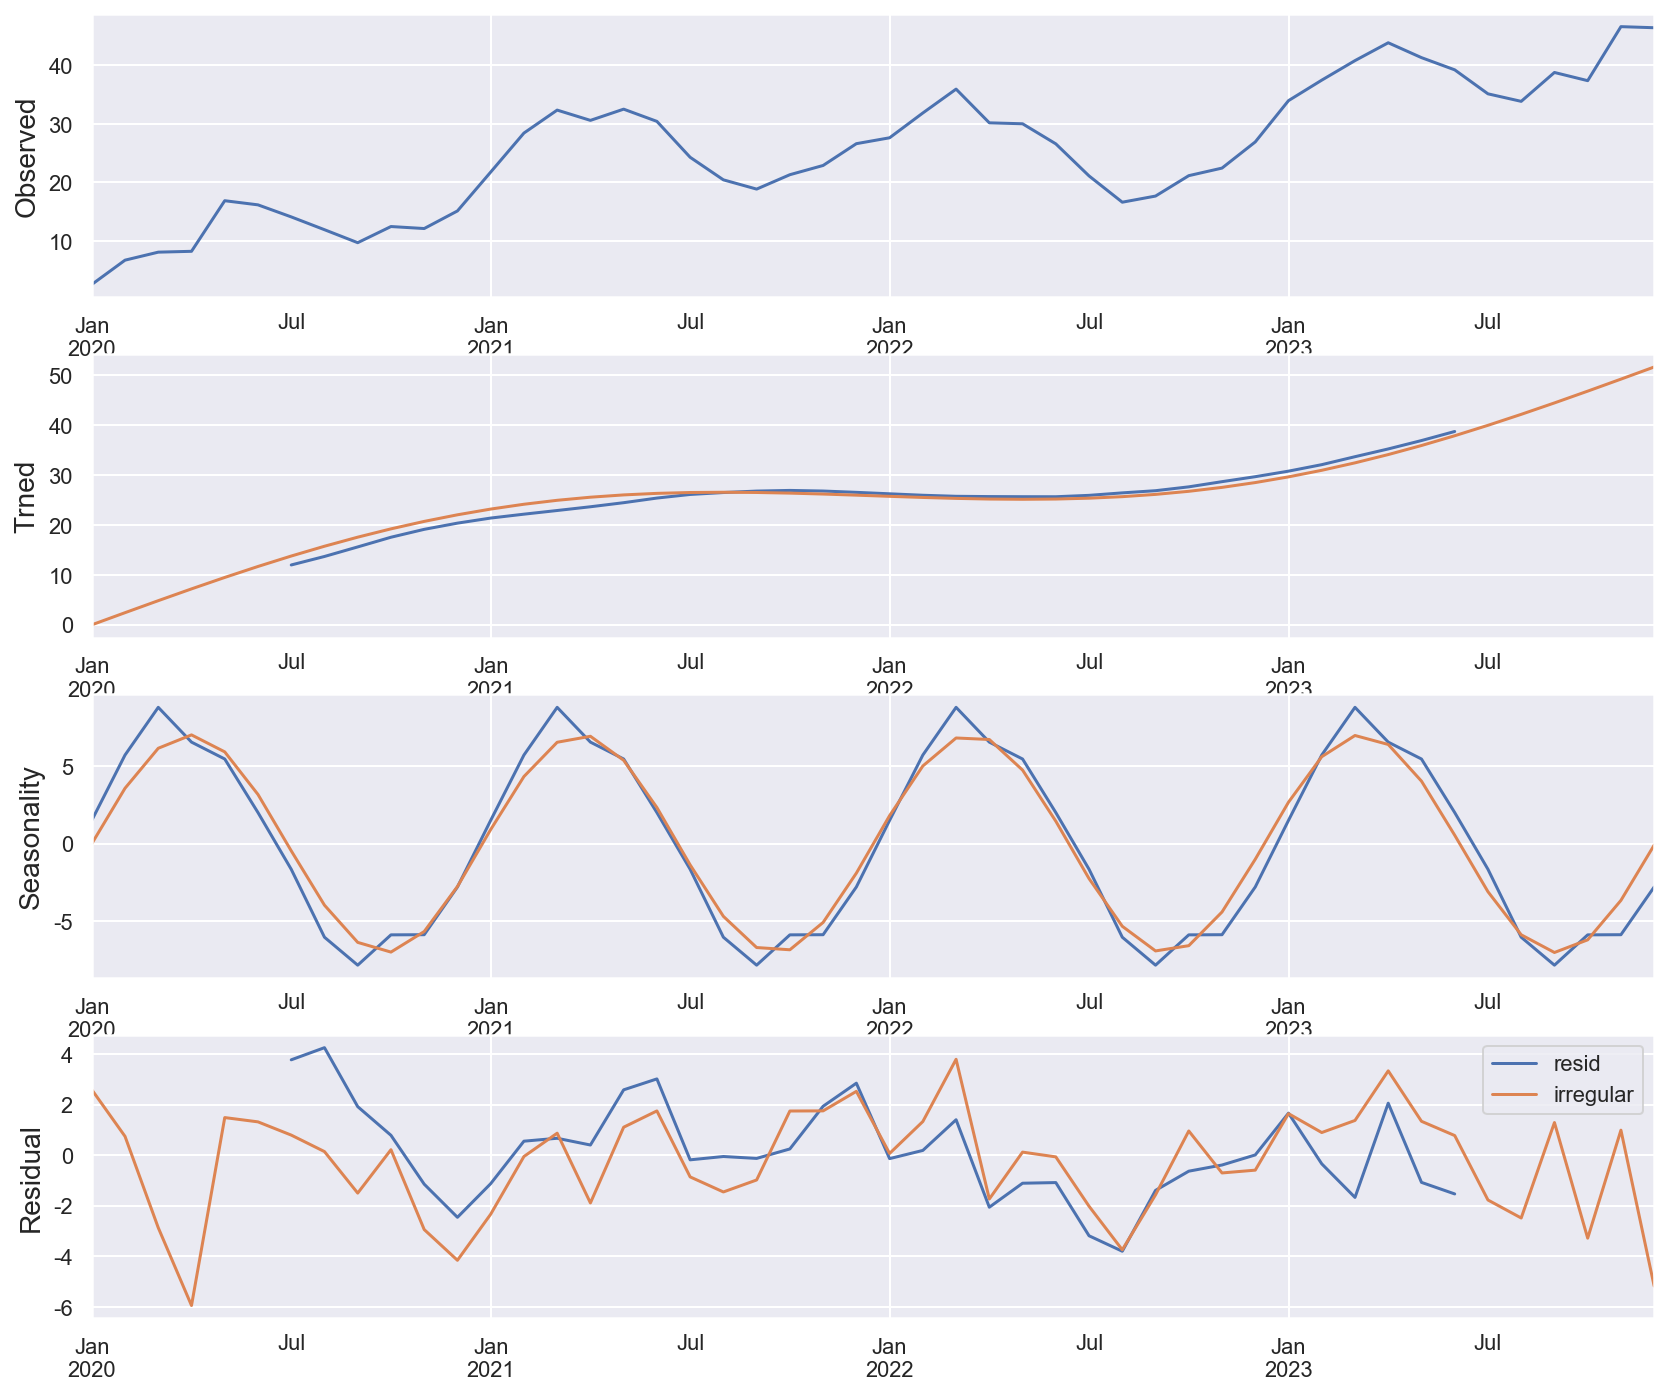

In [123]:
plt.figure(figsize=(14,12))

plt.subplot(4,1,1)
result.observed.plot()
plt.ylabel('Observed', fontsize=14)

plt.subplot(4,1,2)
result.trend.plot(label='Timeseries Decomposition') # timeseries decomposition
df.trend_cycle.plot() # real data
plt.ylabel('Trned', fontsize=14)

plt.subplot(4,1,3)
result.seasonal.plot()
df.seasonal.plot()
plt.ylabel('Seasonality', fontsize=14)

plt.subplot(4,1,4)
result.resid.plot()
df.irregular.plot()
plt.ylabel('Residual', fontsize=14)

plt.legend()
plt.show()

In [126]:
df.head(2)

,timeseries,trend,cycle,trend_cycle,seasonal,irregular
2020-01-01,2.596119,0.0,0.000000,0.000000,0.000000,2.596119
2020-02-01,6.746160,1.1,1.332198,2.432198,3.565684,0.748278


In [142]:
# decomposition한 객체에서의 추세, 계절성, 잔차 attr 확인

decom_df = \
pd.concat([
pd.DataFrame(result.observed), pd.DataFrame(result.trend), \
    pd.DataFrame(result.seasonal), pd.DataFrame(result.resid)], axis=1)

decom_df

,timeseries,trend,seasonal,resid
2020-01-01,2.596119,NaN,1.501630,NaN
2020-02-01,6.746160,NaN,5.701170,NaN
2020-03-01,8.112100,NaN,8.768065,NaN
2020-04-01,8.255941,NaN,6.531709,NaN
2020-05-01,16.889655,NaN,5.446174,NaN
2020-06-01,16.182357,NaN,2.002476,NaN
2020-07-01,14.128087,11.994971,-1.643064,3.776179
2020-08-01,11.943313,13.697685,-6.011071,4.256699
2020-09-01,9.728095,15.611236,-7.807785,1.924644
2020-10-01,12.483489,17.552031,-5.858728,0.790186
